## Movies EDA

Find some interesting insights into a few movies released between 1916 and 2016, using Python. Read a movie dataset, write Python code to explore the data, gain insights into the movies, actors, directors, and collections.

In [1]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

### Task 1: Reading and Inspection

**Subtask 1.1: Import and read**

Import and read the movie database. Store it in a variable called `movies`.

In [2]:
# Write your code for importing the csv file here
movies = pd.read_csv("Movies.csv")
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3849,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,NaN,74
3850,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
3851,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413


**Subtask 1.2: Inspect the dataframe**

Inspect the dataframe's columns, shapes, variable types etc.

In [3]:
# Write your code for inspection here
movies = pd.DataFrame(movies)
print(movies.columns)
print(movies.shape)
print(movies.info())


Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
(3853, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3851 non-null   object 
 1   director_name              3853 non-null   object 
 2   num_critic_for_reviews     3852 non-null   float64
 3   duration        

In [4]:
li=movies.columns[movies.isnull().any()].tolist()
len(li)

12

#### <font color='red'>Question 1: How many rows and columns are present in the dataframe? </font>

In [5]:
print(movies.shape)

(3853, 28)


#### <font color='red'>Question 2: How many columns have null values present in them? Try writing a code for this instead of counting them manually.</font>

In [16]:
null_col = movies.columns[movies.isnull().any()]
len(null_col)

12

### Task 2: Cleaning the Data

**Subtask 2.1: Drop unecessary columns**

Mostly analyze the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [17]:
# Check the 'drop' function in the Pandas library - dataframe.drop(list_of_unnecessary_columns, axis = )
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations

movies.drop(["color","director_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes","actor_3_facebook_likes",
             "actor_2_name","cast_total_facebook_likes","actor_3_name","duration","facenumber_in_poster","content_rating",
             "country","movie_imdb_link","aspect_ratio","plot_keywords"],axis=1,inplace=True)

row,col=movies.shape
print(col)

13


#### <font color='red'>Question 3: What is the count of columns in the new dataframe? </font>


In [18]:
len(movies.columns)

13

**Subtask 2.2: Inspect Null values**

There are null values in multiple columns of the dataframe 'movies'. Find out the percentage of null values in each column of the dataframe 'movies'. 

In [19]:
# Write you code here
movies.isnull().sum()

director_name             0
num_critic_for_reviews    1
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

#### <font color='red'>Question 4: Which column has the highest percentage of null values? </font>
-  <font color='red'>language</font>
-  <font color='red'>genres</font>
-  <font color='red'>num_critic_for_reviews</font>
-  <font color='red'>imdb_score</font>

In [20]:
round(100*(movies.isnull().sum()/len(movies.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

**Subtask 2.3: Fill NaN values**

Notice that the `language` column has some NaN values. Here, on inspection, see that it is safe to replace all the missing values with `'English'`.

In [21]:
# Write your code for filling the NaN values in the 'language' column here
movies["language"].fillna("English",inplace=True)
movies["language"].isnull().sum()
movies["language"].value_counts()

English       3674
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Danish           3
Thai             3
Persian          3
Dutch            3
Aboriginal       2
Hebrew           2
Indonesian       2
Dari             2
None             1
Russian          1
Romanian         1
Bosnian          1
Maya             1
Mongolian        1
Aramaic          1
Dzongkha         1
Vietnamese       1
Zulu             1
Arabic           1
Filipino         1
Hungarian        1
Icelandic        1
Swedish          1
Czech            1
Telugu           1
Kazakh           1
Name: language, dtype: int64

#### <font color='red'>Question 5: What is the count of movies made in English language after replacing the NaN values with English? </font>


In [22]:
(movies.language == 'English').sum()

3674

### Task 3: Data Analysis

**Subtask 3.1: Change the unit of columns**

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [23]:
# Write your code for unit conversion here
movies["budget"]=movies.budget/1000000
movies["gross"]=movies.gross/1000000
movies.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
4,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000


**Subtask 3.2: Find the movies with highest profit**

   1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
   2. Sort the dataframe using the `profit` column as reference. (Find which command can be used here to sort entries from the documentation)
   3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [24]:
# Write your code for creating the profit column here
movies["profit"]=(movies.gross-movies.budget)
movies.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000,198.130642
4,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000,-190.641321


In [25]:
# Write your code for sorting the dataframe here
movies.sort_values(by="profit",ascending=False,inplace=True)
movies.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
2704,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
2748,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
16,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
482,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
230,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
419,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


In [27]:
top10 = movies[:10].reset_index()
top10

,index,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
1,28,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
2,25,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3,2704,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
4,2748,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
5,16,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
6,482,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
7,230,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
8,64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
9,419,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


**Checkpoint:** You might spot two movies directed by `James Cameron` in the list.

#### <font color='red'>Question 6: Which movie is ranked 5th from the top in the list obtained? </font>


In [30]:
top10["movie_title"].iloc[4]

'E.T. the Extra-Terrestrial\xa0'

**Subtask 3.3: Find IMDb Top 250**

Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. 

Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [31]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
movie=movies[movies["num_voted_users"]>25000]
#movie.head()
IMDb_Top_250 = movie.copy()
IMDb_Top_250.sort_values(by="imdb_score",ascending=False,inplace=True)
IMDb_Top_250= IMDb_Top_250[:250].reset_index()
IMDb_Top_250["Rating"]=IMDb_Top_250["imdb_score"].rank(ascending=0)
IMDb_Top_250

,index,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rating
0,1795,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.00,1994.0,9.3,108000,3.341469,1.0
1,3016,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.00,1972.0,9.2,43000,128.821952,2.0
2,2543,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.00,1974.0,9.0,14000,44.300000,3.5
3,64,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.00,2008.0,9.0,37000,348.316061,3.5
4,325,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.00,2003.0,8.9,16000,283.019252,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,3674,Cristian Mungiu,233.0,1.185783,Drama,Anamaria Marinca,"4 Months, 3 Weeks and 2 Days",44763,172.0,Romanian,0.59,2007.0,7.9,14000,0.595783,228.0
246,3767,John Carpenter,318.0,47.000000,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,1191.0,English,0.30,1978.0,7.9,12000,46.700000,228.0
247,2266,John Carpenter,318.0,47.000000,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191.0,English,0.30,1978.0,7.9,12000,46.700000,228.0
248,607,Michael Mann,209.0,28.965197,Biography|Drama|Thriller,Al Pacino,The Insider,133526,521.0,English,68.00,1999.0,7.9,0,-39.034803,228.0


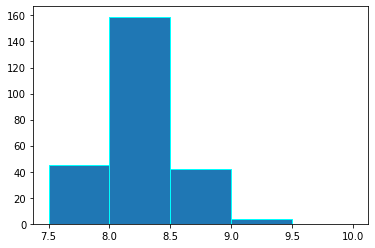

In [33]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'cyan')
plt.show()

#### <font color='red'>Question 7: Suppose movies are divided into 5 buckets based on the IMDb ratings: </font>

<font color = 'red'> Which bucket holds the maximum number of movies from *IMDb_Top_250*? </font>

From the histogram it is evident that the bucket 8 to 8.5 holds the max. number of movies from IMDb Top 250

**Subtask 3.4: Find the critic-favorite and audience-favorite actors**

   1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure to use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
   2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
   3. Group the combined dataframe using the `actor_1_name` column.
   4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [35]:
# Write your code for creating three new dataframes here
movi=pd.read_csv("Movies.csv")
movi=pd.DataFrame(movi)
#movie
Meryl_Streep = movi.loc[movi["actor_1_name"]=="Meryl Streep"]
Meryl_Streep

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
392,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112703470.0,Comedy|Drama|Romance,...,214.0,English,USA,R,85000000.0,2009.0,2000.0,6.6,1.85,0
1038,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46815748.0,Action|Adventure|Crime|Thriller,...,69.0,English,USA,PG-13,45000000.0,1994.0,894.0,6.3,2.35,0
1132,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94125426.0,Biography|Drama|Romance,...,277.0,English,USA,PG-13,40000000.0,2009.0,935.0,7.0,1.85,13000
1322,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124732962.0,Comedy|Drama|Romance,...,631.0,English,USA,PG-13,35000000.0,2006.0,11000.0,6.8,2.35,0
1390,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14998070.0,Drama|Thriller|War,...,298.0,English,USA,R,35000000.0,2007.0,10000.0,6.2,2.35,0
1471,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87100000.0,Biography|Drama|Romance,...,200.0,English,USA,PG,31000000.0,1985.0,920.0,7.2,1.85,0
1514,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63536011.0,Comedy|Drama|Romance,...,178.0,English,USA,PG-13,30000000.0,2012.0,7000.0,6.3,2.35,0
1563,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23209440.0,Drama,...,112.0,English,USA,R,30000000.0,1998.0,882.0,7.0,1.85,592
1784,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41597830.0,Drama|Romance,...,660.0,English,USA,PG-13,25000000.0,2002.0,577.0,7.6,1.85,0
2500,Color,Phyllida Lloyd,331.0,105.0,58.0,583.0,Jim Broadbent,11000.0,29959436.0,Biography|Drama|History,...,350.0,English,UK,PG-13,13000000.0,2011.0,1000.0,6.4,2.35,18000


In [36]:
Leo_Caprio = movi.loc[movi["actor_1_name"]=="Leonardo DiCaprio"]
Leo_Caprio

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
25,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
49,Color,Baz Luhrmann,490.0,143.0,1000.0,77.0,Elizabeth Debicki,29000.0,144812796.0,Drama|Romance,...,753.0,English,Australia,PG-13,105000000.0,2013.0,509.0,7.3,2.35,115000
94,Color,Christopher Nolan,642.0,148.0,22000.0,23000.0,Tom Hardy,29000.0,292568851.0,Action|Adventure|Sci-Fi|Thriller,...,2803.0,English,USA,PG-13,160000000.0,2010.0,27000.0,8.8,2.35,175000
173,Color,Alejandro G. Iñárritu,556.0,156.0,0.0,733.0,Tom Hardy,29000.0,183635922.0,Adventure|Drama|Thriller|Western,...,1188.0,English,USA,R,135000000.0,2015.0,27000.0,8.1,2.35,190000
246,Black and White,Martin Scorsese,267.0,170.0,17000.0,827.0,Adam Scott,29000.0,102608827.0,Biography|Drama,...,799.0,English,USA,PG-13,110000000.0,2004.0,3000.0,7.5,2.35,0
283,Color,Quentin Tarantino,765.0,165.0,16000.0,265.0,Christoph Waltz,29000.0,162804648.0,Drama|Western,...,1193.0,English,USA,R,100000000.0,2012.0,11000.0,8.5,2.35,199000
293,Color,Edward Zwick,166.0,143.0,380.0,452.0,Djimon Hounsou,29000.0,57366262.0,Adventure|Drama|Thriller,...,657.0,English,Germany,R,100000000.0,2006.0,3000.0,8.0,2.35,14000
294,Color,Martin Scorsese,606.0,240.0,17000.0,4000.0,Matthew McConaughey,29000.0,116866727.0,Biography|Comedy|Crime|Drama,...,1138.0,English,USA,R,100000000.0,2013.0,11000.0,8.2,2.35,138000
312,Color,Martin Scorsese,233.0,216.0,17000.0,1000.0,Liam Neeson,29000.0,77679638.0,Crime|Drama,...,1166.0,English,USA,R,100000000.0,2002.0,14000.0,7.5,2.35,0
347,Color,Martin Scorsese,352.0,151.0,17000.0,1000.0,Matt Damon,29000.0,132373442.0,Crime|Drama|Thriller,...,2054.0,English,USA,R,90000000.0,2006.0,13000.0,8.5,2.35,29000


In [37]:
Brad_Pitt = movi.loc[movi["actor_1_name"]=="Brad Pitt"]
Brad_Pitt

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
97,Color,David Fincher,362.0,166.0,21000.0,919.0,Jason Flemyng,11000.0,127490802.0,Drama|Fantasy|Romance,...,822.0,English,USA,PG-13,150000000.0,2008.0,1000.0,7.8,2.35,23000
142,Color,Wolfgang Petersen,220.0,196.0,249.0,844.0,Orlando Bloom,11000.0,133228348.0,Adventure,...,1694.0,English,USA,R,175000000.0,2004.0,5000.0,7.2,2.35,0
243,Color,Steven Soderbergh,198.0,125.0,0.0,350.0,Julia Roberts,11000.0,125531634.0,Crime|Thriller,...,627.0,English,USA,PG-13,110000000.0,2004.0,8000.0,6.4,2.35,0
244,Color,Doug Liman,233.0,126.0,218.0,322.0,Angelina Jolie Pitt,11000.0,186336103.0,Action|Comedy|Crime|Romance|Thriller,...,798.0,English,USA,PG-13,120000000.0,2005.0,11000.0,6.5,2.35,0
367,Color,Tony Scott,142.0,114.0,12000.0,307.0,Stephen Dillane,11000.0,26871.0,Action|Crime|Thriller,...,361.0,English,Germany,R,92000000.0,2001.0,577.0,7.0,2.35,0
383,Color,Steven Soderbergh,186.0,116.0,0.0,471.0,Bernie Mac,11000.0,183405771.0,Crime|Thriller,...,845.0,English,USA,PG-13,85000000.0,2001.0,1000.0,7.8,2.35,0
448,Color,David Ayer,406.0,134.0,452.0,697.0,Logan Lerman,11000.0,85707116.0,Action|Drama|War,...,701.0,English,USA,R,68000000.0,2014.0,8000.0,7.6,2.35,82000
579,Color,Jean-Jacques Annaud,76.0,136.0,218.0,400.0,Mako,11000.0,37901509.0,Adventure|Biography|Drama|History|War,...,119.0,English,USA,PG-13,70000000.0,1997.0,691.0,7.0,2.35,0
646,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000.0,37023395.0,Drama,...,2968.0,English,USA,R,63000000.0,1999.0,783.0,8.8,2.35,48000
749,Color,Patrick Gilmore,98.0,85.0,0.0,82.0,Adriano Giannini,11000.0,26288320.0,Adventure|Animation|Comedy|Drama|Family|Fantas...,...,91.0,English,USA,PG,60000000.0,2003.0,102.0,6.7,1.66,880


In [38]:
# Write your code for combining the three dataframes here
Combined = pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt])

In [39]:
# Write your code for grouping the combined dataframe here
com=Combined.groupby('actor_1_name')

In [40]:
# Write the code for finding the mean of critic reviews and audience reviews here
com["num_user_for_reviews"].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

#### <font color='red'>Question 8: Which actor is highest rated among the three actors according to the user reviews? </font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

#### <font color='red'>Question 9: Which actor is highest rated among the three actors according to the critics?</font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

In [41]:
com["num_critic_for_reviews"].mean()

actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64